**Market Basket Analysis**

Importing Libraries for analysis

In [4]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules 
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Data

In [3]:
data = pd.read_csv('ifood_df.csv')
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


Exploratory data analysis

In [ ]:
data.describe()

In [ ]:
data.isnull().sum()

Graphs [Histograms]

In [ ]:
plt.figure(figsize=(30,45))
for i, col in enumerate(df.columns):
  if df[col].dtype != 'object':
    ax = plt.subplot(6,3, i+1)
    sns.kdeplot(df[col], ax=ax)
    plt.xlabel(col)

plt.show()


C:\Users\weroc\AppData\Local\Temp\ipykernel_32752\2842714127.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[col], ax = h_plt)
C:\Users\weroc\AppData\Local\Temp\ipykernel_32752\2842714127.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[col], ax = h_plt)


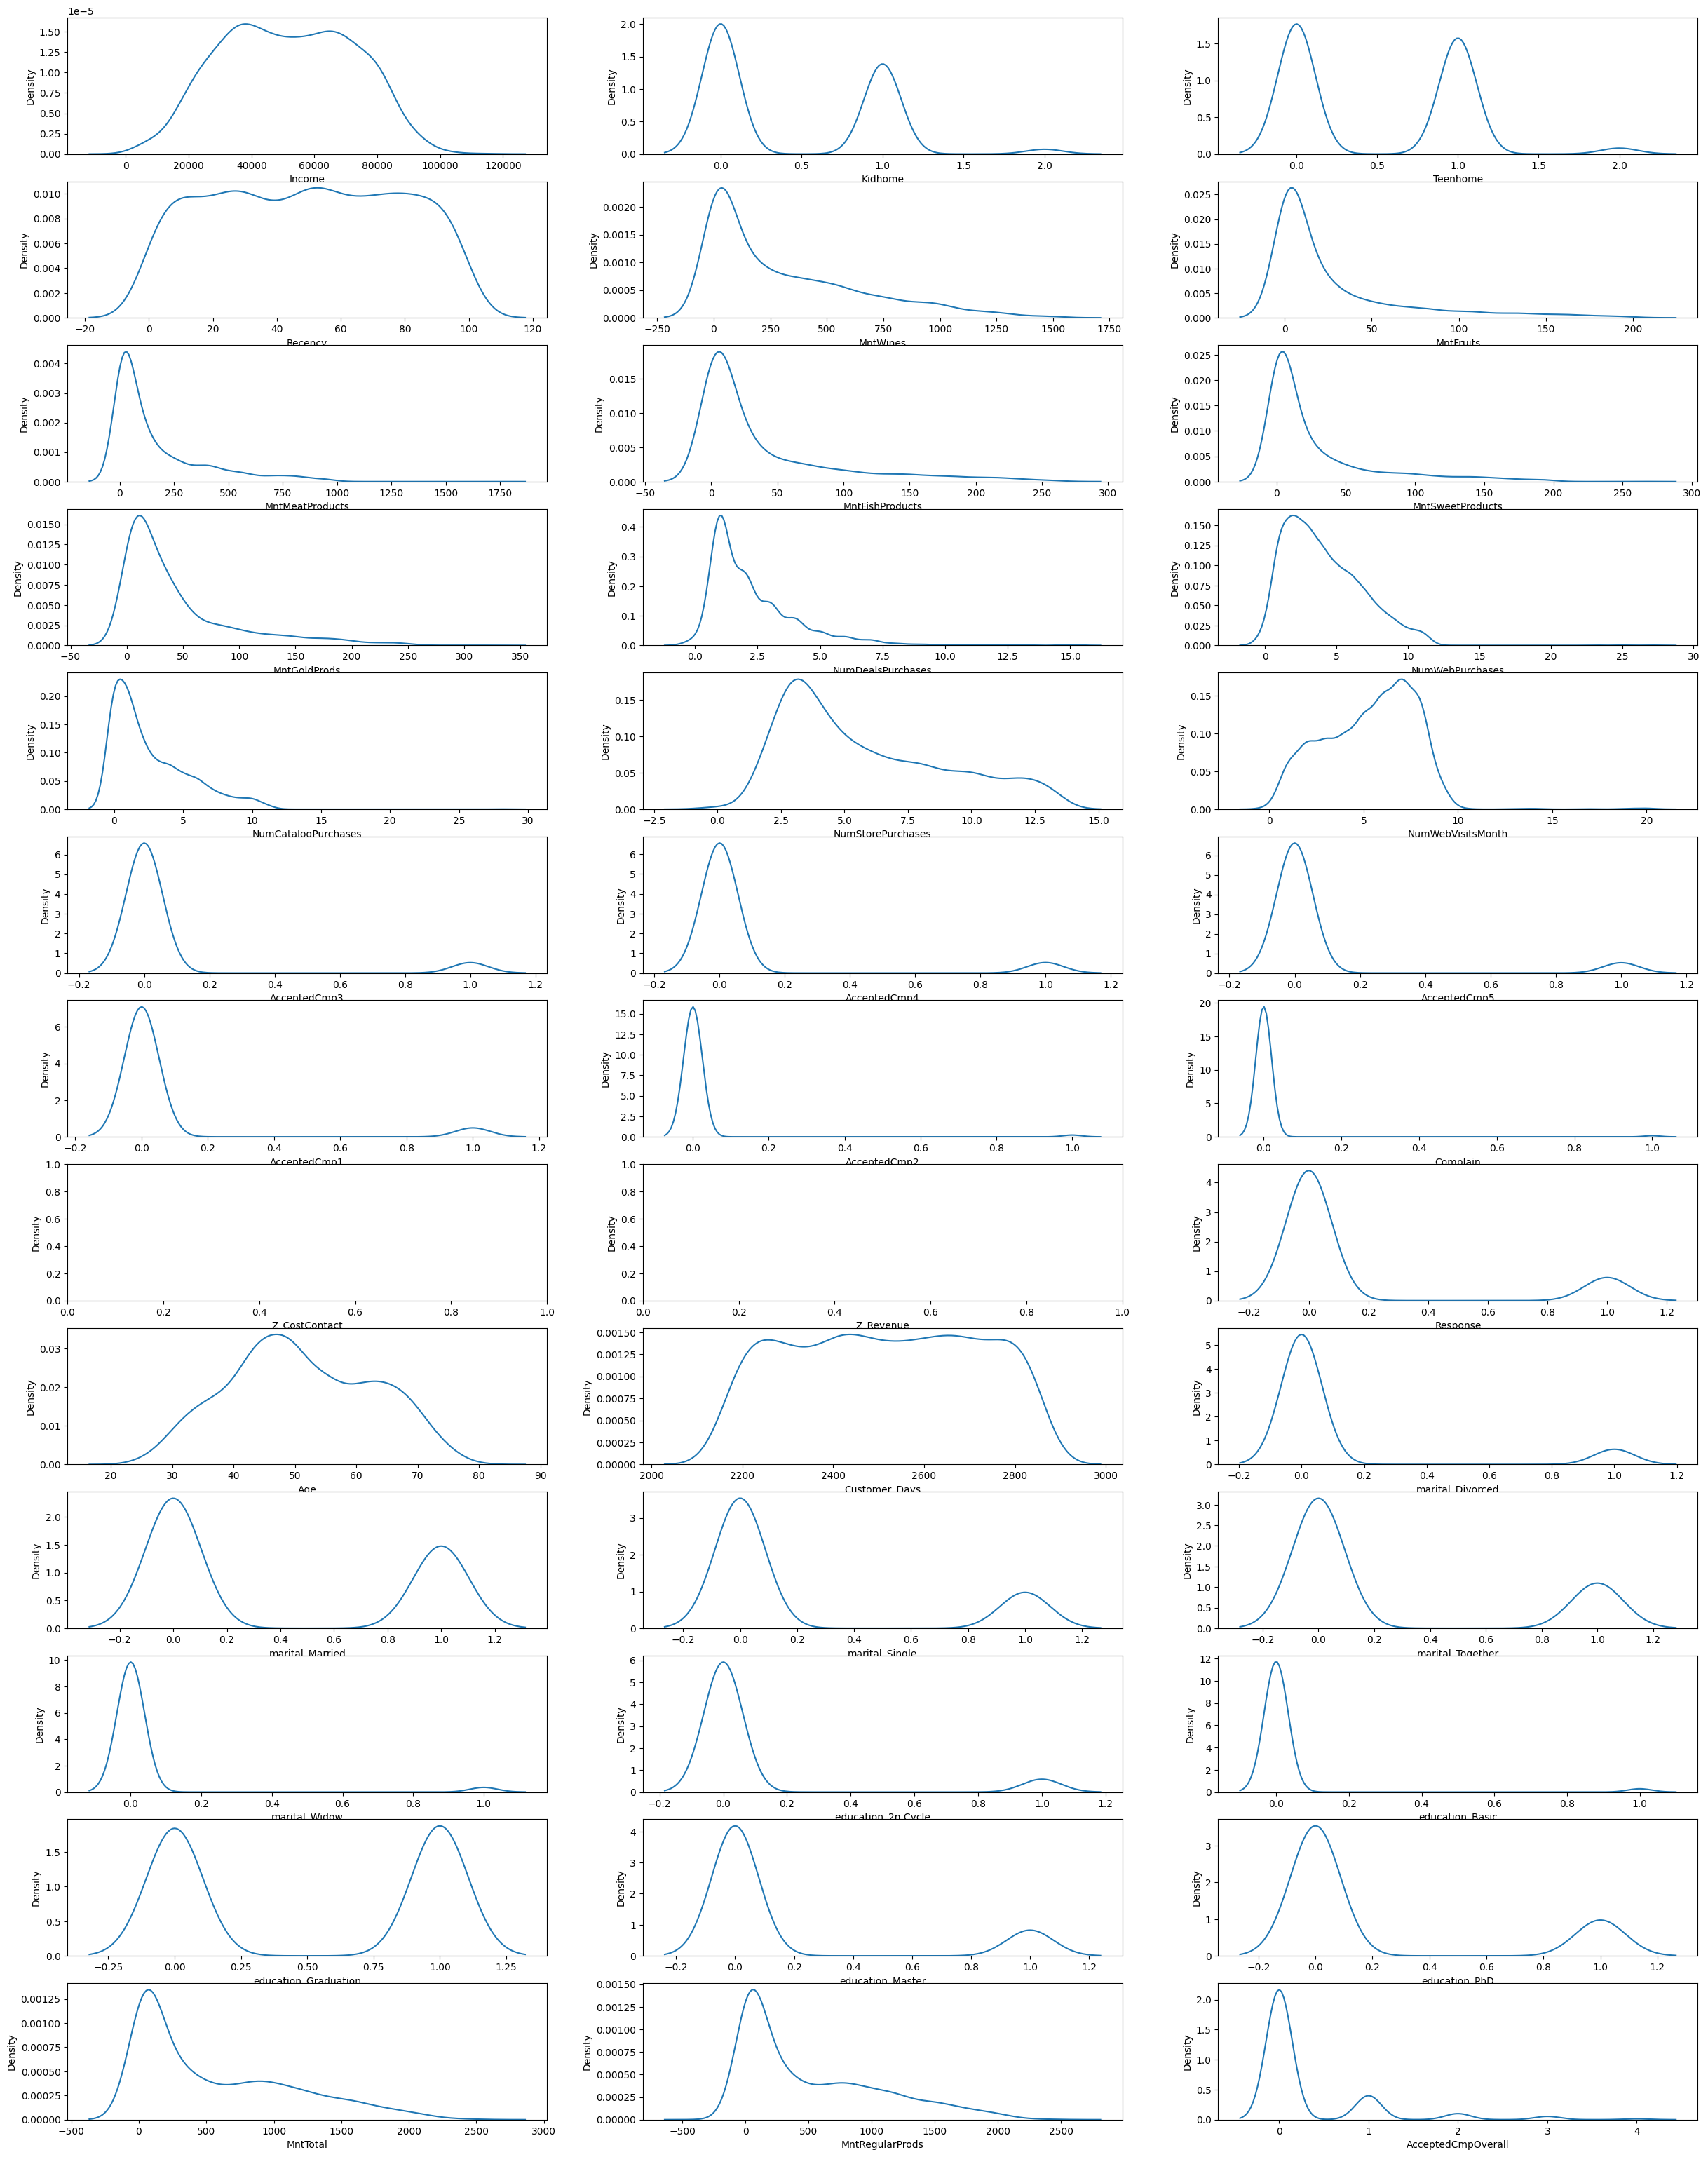

In [10]:
plt.figure(figsize = (30,45))
for i, col in enumerate(data.columns):
    if data[col].dtype != 'object':
        h_plt = plt.subplot(15,3, i+1)
        sns.kdeplot(data[col], ax = h_plt)
        plt.xlabel(col)

plt.show()

Create a df with relevant columns (for analysis)

In [15]:
df = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
df.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15


Create the correlation matrix

<Axes: >

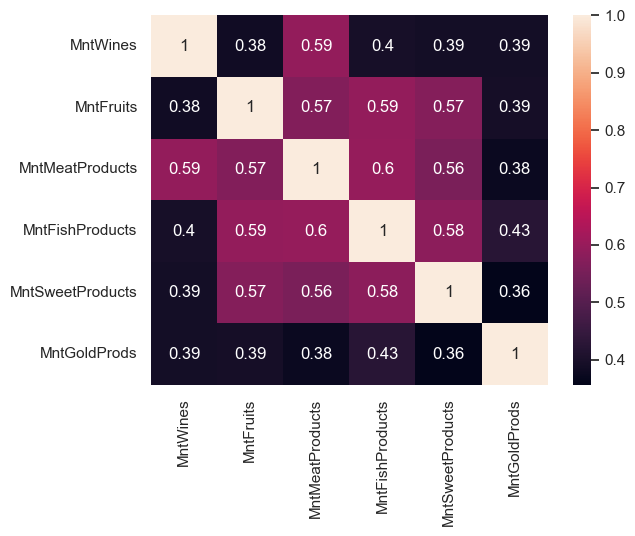

In [24]:
df_cor = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

correlation_matrix = df_cor.corr()
sns.heatmap(correlation_matrix, annot=True)

**Some insights from the provided correlation matrix**

Positive Correlations:
There is a strong positive correlation (around 0.59) between spending on Meat Products (MntMeatProducts) and Wines (MntWines). Customers who spend more on Meat Products tend to spend more on Wines.
There is a positive correlation between spending on Fruits (MntFruits) and Fish Products (MntFishProducts) with values around 0.57 and 0.59, respectively. Customers who spend more on Fruits also tend to spend more on Fish Products.
Moderate Correlations:
There is a moderate positive correlation (around 0.39) between spending on Gold Products (MntGoldProds) and both Wines (MntWines) and Fruits (MntFruits).
Spending on Sweet Products (MntSweetProducts) shows moderate positive correlations with Fruits (MntFruits), Meat Products (MntMeatProducts), and Fish Products (MntFishProducts) with values around 0.57, 0.56, and 0.58, respectively.
Low Correlations:
The correlation between Gold Products (MntGoldProds) and Sweet Products (MntSweetProducts) is relatively low (around 0.36).
Interpretation:
Customers who have a preference for Meat Products are likely to also spend more on Wines.
There is a tendency for customers to spend on both Fruits and Fish Products, indicating a potential association between these food categories.
Moderate correlations between Gold Products and other categories suggest that customers interested in luxury items (Gold Products) may also spend moderately on certain food categories.

Code to dummy code the variables:
1 - Purchased
0 - Not purchased

In [19]:
def dummy_code(x):
  if(x<=0):
    return 0
  else:
    return 1

#dummy code all the df
df = df.map(dummy_code)

df.head(10)

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1
5,1,1,1,0,1,1
6,1,1,1,1,1,1
7,1,1,1,1,1,1
8,1,0,1,1,1,1
9,1,0,1,1,1,1


Apriori algorithm for association rule mining

In [30]:
df = df.astype(bool)

In [31]:
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)

In [33]:
# Generate association rules for confidence
rules_confidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)

# Generate association rules for lift
rules_lift = association_rules(frequent_itemsets, metric="lift", min_threshold=0.8)

In [34]:
# Combine the results
rules = pd.concat([rules_confidence, rules_lift], axis=0, ignore_index=True)

In [35]:
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)

Frequent Itemsets:
     support                                           itemsets
0   0.994104                                         (MntWines)
1   0.821769                                        (MntFruits)
2   0.999546                                  (MntMeatProducts)
3   0.828118                                  (MntFishProducts)
4   0.813605                                 (MntSweetProducts)
..       ...                                                ...
58  0.710658  (MntSweetProducts, MntFruits, MntWines, MntGol...
59  0.646712  (MntSweetProducts, MntFruits, MntWines, MntFis...
60  0.714286  (MntSweetProducts, MntWines, MntFishProducts, ...
61  0.649887  (MntFruits, MntSweetProducts, MntFishProducts,...
62  0.646712  (MntSweetProducts, MntFruits, MntWines, MntFis...

[63 rows x 2 columns]

Association Rules:
            antecedents                                        consequents  \
0            (MntWines)                                        (MntFruits)   
1           (M

Visualize the support, confidence, and lift

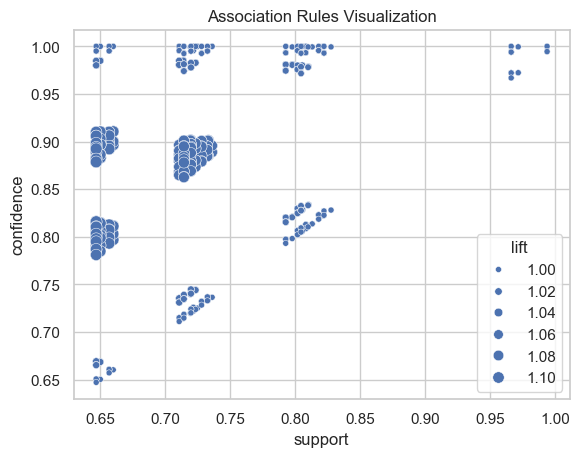

In [36]:
sns.scatterplot(x="support", y="confidence", size="lift", data=rules)
plt.title("Association Rules Visualization")
plt.show()

In [40]:
# Sort rules by confidence and lift in descending order
sorted_rules = rules.sort_values(by=['confidence', 'lift'], ascending=[False, False])

Top 20 rules

In [53]:
top_20_rules = sorted_rules.head(20)
print("Top 20 Rules:")
top_20_rules

Top 20 Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
947,"(MntSweetProducts, MntFruits)","(MntFishProducts, MntWines, MntGoldProds)",0.724717,0.804535,0.646712,0.892365,1.109169,0.063652,1.816005,0.357537
1063,"(MntSweetProducts, MntFruits)","(MntFishProducts, MntWines, MntMeatProducts, M...",0.724717,0.804535,0.646712,0.892365,1.109169,0.063652,1.816005,0.357537
463,"(MntSweetProducts, MntMeatProducts, MntFruits)","(MntFishProducts, MntWines, MntGoldProds)",0.724717,0.804535,0.646712,0.892365,1.109169,0.063652,1.816005,0.357537
1046,"(MntSweetProducts, MntMeatProducts, MntFruits)","(MntFishProducts, MntWines, MntGoldProds)",0.724717,0.804535,0.646712,0.892365,1.109169,0.063652,1.816005,0.357537
389,"(MntSweetProducts, MntFruits)","(MntFishProducts, MntWines, MntGoldProds)",0.724717,0.804535,0.646712,0.892365,1.109169,0.063652,1.816005,0.357537
476,"(MntSweetProducts, MntFruits)","(MntFishProducts, MntWines, MntMeatProducts, M...",0.724717,0.804535,0.646712,0.892365,1.109169,0.063652,1.816005,0.357537
946,"(MntFishProducts, MntWines, MntGoldProds)","(MntSweetProducts, MntFruits)",0.804535,0.724717,0.646712,0.803833,1.109169,0.063652,1.403313,0.503539
1059,"(MntFishProducts, MntWines, MntGoldProds)","(MntSweetProducts, MntMeatProducts, MntFruits)",0.804535,0.724717,0.646712,0.803833,1.109169,0.063652,1.403313,0.503539
475,"(MntFishProducts, MntWines, MntGoldProds)","(MntSweetProducts, MntMeatProducts, MntFruits)",0.804535,0.724717,0.646712,0.803833,1.109169,0.063652,1.403313,0.503539
459,"(MntFishProducts, MntWines, MntMeatProducts, M...","(MntSweetProducts, MntFruits)",0.804535,0.724717,0.646712,0.803833,1.109169,0.063652,1.403313,0.503539


**Interpretation of top 5 rules**

Rule 1:
Customers who purchase sweet products and fruits are also likely to purchase fish products, wines, and gold products. This suggests that these customers have a higher disposable income and are more likely to treat themselves to luxury goodsity products.

Rule 2:
Customers who purchase sweet products, fruits, and meat products are also likely to purchase fish products, wines, and gold products. This suggests that these customers have a diverse range of tastes and are interested in trying new things.

Rule 3:
Customers who purchase sweet products, meat products, and fruits are also likely to purchase fish products, wines, and gold products. This suggests that these customers are interested in a variety of cuisines and enjoy pairing different foods and drinks together.

Rule 4:
Customers who purchase sweet products and fruits are also likely to purchase fish products, wines, meat products, and gold products. This suggests that these customers are affluent and enjoy indulging in a variety of luxury goods.

Rule 5:
Customers who purchase fish products, wines, and gold products are also likely to purchase sweet products and fruits. This suggests that these customers have a refined taste and enjoy treating themselves to high-quality products.

In [45]:
# Sort rules by lift
sorted_rules = rules.sort_values(by=['lift'], ascending=False)
sorted_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
947,"(MntSweetProducts, MntFruits)","(MntFishProducts, MntWines, MntGoldProds)",0.724717,0.804535,0.646712,0.892365,1.109169,0.063652,1.816005,0.357537
1063,"(MntSweetProducts, MntFruits)","(MntFishProducts, MntWines, MntMeatProducts, M...",0.724717,0.804535,0.646712,0.892365,1.109169,0.063652,1.816005,0.357537
463,"(MntSweetProducts, MntMeatProducts, MntFruits)","(MntFishProducts, MntWines, MntGoldProds)",0.724717,0.804535,0.646712,0.892365,1.109169,0.063652,1.816005,0.357537
1046,"(MntSweetProducts, MntMeatProducts, MntFruits)","(MntFishProducts, MntWines, MntGoldProds)",0.724717,0.804535,0.646712,0.892365,1.109169,0.063652,1.816005,0.357537
389,"(MntSweetProducts, MntFruits)","(MntFishProducts, MntWines, MntGoldProds)",0.724717,0.804535,0.646712,0.892365,1.109169,0.063652,1.816005,0.357537


Thank You!